import necessary libraries & assign csv file 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab



In [2]:
hot100 = pd.read_csv("HotStuff2.csv")
pfork = pd.read_csv("ps4k.csv")
goat = pd.read_csv("goats.csv").set_index("Number")
winners = pd.read_csv("gramcys.csv").drop(columns="awardType").sort_values("annualGrammy").reset_index(drop=True)

In [3]:
#FUNCTIONS
def albumGrammyInfo(album):
    artist = winners.iloc[index]["name"]
    year = winners.iloc[index]["year"]
    cat = winners.iloc[index]["category"]
    print("In %d, %s won %s for %s." % (year, artist, cat, album))
    
    

In [4]:
def songGrammyInfo(song):
    artist = winners.iloc[index]["name"]
    year = winners.iloc[index]["year"]
    cat = winners.iloc[index]["category"]
    print("In %d, %s won %s for %s." % (year, artist, cat, song))


In [5]:
def findGOATalbum(album):
    if goat["Album"].str.contains(album).any():
        print("The Rolling Stones considers this album one of the GOATs.")
        display(goat.loc[goat["Album"] == album])
    else:
        pass

In [6]:
def findOthers(year):
    if goat["Year"].isin([year]).any():
        goatNum = len(goat.loc[goat["Year"] == year])
        if goatNum > 1:
            print("Actually, " + str(goatNum) + " GOAT albums came out that year.")
            display(goat.loc[goat["Year"] == year])
    else:
        pass

In [7]:
def findGOATartist(artist):
    if goat["Artist"].str.contains(artist).any():
        albumCount = len(goat.loc[goat["Artist"] == artist])
        print("They do have " + str(albumCount) + " GOAT album(s) though.")
        display(goat.loc[goat["Artist"] == artist])
        

In [8]:
def findP4Krating(album):
    if pfork["album"].str.contains(album).any():
        rating = pfork.loc[pfork["album"] == album]
        score = rating.iloc[0]["score"]
        artistName = rating.iloc[0]["artist"]
        print("Pitchfork rated %s by %s: %g out of 10." % (album, artistName, score))

In [9]:
#BILLBOARD HOT 100 SECTION
#order hot100.csv file by week and chart position
hot100["WeekID"]=pd.to_datetime(hot100["WeekID"])
hot100.sort_values(["WeekID", "Week Position"], inplace=True, ascending=True)
hot100.set_index("WeekID")


,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart
WeekID,,,,,,,
1958-08-02,1,Poor Little Fool,Ricky Nelson,1,NaN,1,1
1958-08-02,2,Patricia,Perez Prado And His Orchestra,1,NaN,2,1
1958-08-02,3,Splish Splash,Bobby Darin,1,NaN,3,1
1958-08-02,4,Hard Headed Woman,Elvis Presley With The Jordanaires,1,NaN,4,1
1958-08-02,5,When,Kalin Twins,1,NaN,5,1
1958-08-02,6,Rebel-'rouser,Duane Eddy His Twangy Guitar And The Rebels,1,NaN,6,1
1958-08-02,7,Yakety Yak,The Coasters,1,NaN,7,1
1958-08-02,8,My True Love,Jack Scott,1,NaN,8,1
1958-08-02,9,Willie And The Hand Jive,The Johnny Otis Show,1,NaN,9,1


In [10]:

#GRAMMY SECTION
while True:
    interest = input("Are you interested in artists, albums, or songs? ")
    if interest.lower() not in ("artists", "albums", "songs"):
        print("try again sweetie.")
    else:
        break
    
if interest.lower() == "artists":
    artistQuery = input("Pick an artist: ")
    if winners["name"].str.contains(artistQuery).any():
        gramCount = len(winners.loc[winners["name"] == artistQuery])
        print("Total number of Grammy awards: " + str(gramCount))
        display(winners.loc[winners["name"] == artistQuery])
    else:
        print("They don't have any Grammy Awards.")
        findGOATartist(artistQuery)
           
elif interest.lower() == "albums":
    albumQuery = input("Pick an album: ")
    findP4Krating(albumQuery) #DANGER WILL ROBINSON
    if winners["awardFor"].str.contains(albumQuery).any():
        gramCount = len(winners.loc[winners["awardFor"] == albumQuery])
        print("Total number of Grammy awards: " + str(gramCount))
        display(winners.loc[winners["awardFor"] == albumQuery])
    else:
        print("This album has no Grammy Awards.")
        findGOATalbum(albumQuery)    
    
elif interest.lower() == "songs":
    songQuery = input("Pick a song: ")
    if winners["awardFor"].str.contains(songQuery).any():
        gramCount = len(winners.loc[winners["awardFor"] == songQuery])
        print("Total number of Grammy awards: " + str(gramCount))
        display(winners.loc[winners["awardFor"] == songQuery])
    else:
        print("This song has no Grammy Awards.")
        
        
#don't pick a Best New Artist category
index = int(input("Type the index number of a category you're interested in: "))
winners.iloc[index]

if winners.iloc[index].str.contains("Album").any():
    albumQuery = winners.iloc[index]["awardFor"]
    albumYear = winners.iloc[index]["year"] - 1
    albumGrammyInfo(albumQuery)
    findP4Krating(albumQuery)
    findGOATalbum(albumQuery)
    findOthers(albumYear)
    
else:
    songQuery = winners.iloc[index]["awardFor"]
    songGrammyInfo(songQuery)

Are you interested in artists, albums, or songs? songs
Pick a song: crazy in love
This song has no Grammy Awards.
Type the index number of a category you're interested in: 0
In 1959, Nel Blu Dipinto Di Blu (Volare) won Record Of The Year for Nel Blu Dipinto Di Blu (Volare).


In [14]:
#PITCHFORK REVIEWS SECTION
pfork["date"] = pd.to_datetime(pfork["date"])

#search by album
album = input("Find an album: ")
if pfork["album"].str.contains(album).any():
    rating = pfork.loc[pfork["album"] == album]
    if len(rating) > 1:
        display(rating)
    else:
        score = rating.iloc[0]["score"]
        artistName = rating.iloc[0]["artist"]
        print("Pitchfork rated this album by %s: %g out of 10." % (artistName, score))
else: print("Pitchfork hasn't reviewed this album.")



Find an album: Bad


IndexError: single positional indexer is out-of-bounds

In [12]:
#search by artist
artist = input("Find an artist: ")
rating = pfork.loc[pfork["artist"] == artist].reset_index(drop=True)
display(rating)



Find an artist: Jay Z


,album,artist,date,genre,score


In [13]:
#GREATEST ALBUMS SECTION
#search by album
def findGOATalbum(album):
    if goat["Album"].str.contains(album).any():
        print("Heck yeah!")
        return goat.loc[goat["Album"] == album]
    else:
        print("Sorry, it's not...yet.")

albumQuery = input("Is this album a GOAT? ")        
findGOATalbum(albumQuery)



Is this album a GOAT? Bad
Heck yeah!


,Year,Album,Artist,Genre
Number,,,,
203,1987,Bad,Michael Jackson,"Funk / Soul, Pop"


In [15]:
#search by artist
def findGOATartist(artist):
    if goat["Artist"].str.contains(artist).any():
        albumCount = len(goat.loc[goat["Artist"] == artist])
        print("Heck yeah! They have " + str(albumCount) + " GOAT albums.")
        return goat.loc[goat["Artist"] == artist]
    else:
        print("Sorry, they don't...yet.")

artistQuery = input("Does this artist have GOATs? ")
findGOATartist(artistQuery)

Does this artist have GOATs? Michael Jackson
Heck yeah! They have 3 GOAT albums.


,Year,Album,Artist,Genre
Number,,,,
20,1982,Thriller,Michael Jackson,"Funk / Soul, Pop"
68,1979,Off the Wall,Michael Jackson,"Funk / Soul, Pop"
203,1987,Bad,Michael Jackson,"Funk / Soul, Pop"


In [16]:
#search by year
def findGOATyear(year):
    if goat["Year"].isin([year]).any():
        goatNum = len(goat.loc[goat["Year"] == year])
        print(str(goatNum) + " GOAT albums came out that year.")
        return goat.loc[goat["Year"] == year]
    else:
        print("That is all.")
        print(type(goat["Year"]))

yearQuery = int(input("Any GOATs this year? "))
findGOATyear(yearQuery)



Any GOATs this year? 2004
2 GOAT albums came out that year.


,Year,Album,Artist,Genre
Number,,,,
151,2004,Funeral,Arcade Fire,Rock
225,2004,American Idiot,Green Day,Rock


Topics: Year, Artist, Genre
Please enter one of the topics above: Artist


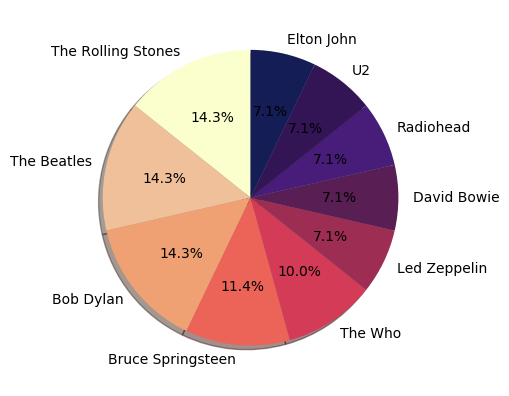

In [65]:
#Graph of GOATS
print("Topics: Year, Artist, Genre")
topic = input("Please enter one of the topics above: ")
if topic == "Year":
    fig = plt.figure()
    groups =goat.Year.value_counts().head(10)
    labels = groups.index
    colors = ['#00008b','#1c1cf0','#5740ec','#7750cc','#9760ac','#b7708c','#d7806c','#dd9484','#e3a89c','#f0d1cc']
    plt.pie(groups, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.show()
if topic == "Artist":
    fig = plt.figure()
    groups =goat.Artist.value_counts().head(10)
    labels = groups.index
    colors = ['#faffcd','#f0c09a','#f0a173','#ec6358','#d33b57','#9e2d53','#591e54','#481d79','#331455','#141d55']
    plt.pie(groups, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.show()
if topic == "Genre":
    fig = plt.figure()
    groups =goat.Genre.value_counts().head(10)
    labels = groups.index
    colors = ['#693e8d','#7054b6','#726ac9','#6d81c7','#6f91cc','#698be7','#8993e0','#a99bd9','#c9a3d2','#d9abcb']
    plt.pie(groups, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.show()

